In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans

In [2]:
data = np.loadtxt('data_multivar.txt', delimiter=',')
num_clusters = 4

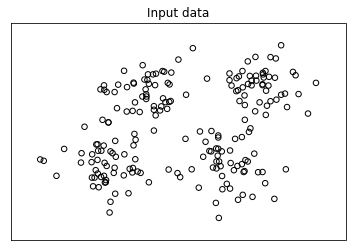

In [10]:
plt.figure()
plt.scatter(data[:,0], data[:,1], marker='o', facecolor='none', edgecolor='k', s=30)
x_min, x_max = min(data[:,0]) - 1, max(data[:,0]) + 1
y_min, y_max = min(data[:,1]) - 1, max(data[:,1]) + 1
plt.title('Input data')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [4]:
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [5]:
step_size = 0.01
x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

In [21]:
?np.meshgrid
nx, ny = 3, 2
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
print(x, y)
xv, yv = np.meshgrid(x, y)
print(xv)
print(yv)
# xv is the x-coordinate, yv is the y-coordinate
# (xv, yv) element-wise form the final coordinate matrices

[ 0.   0.5  1. ] [ 0.  1.]
[[ 0.   0.5  1. ]
 [ 0.   0.5  1. ]]
[[ 0.  0.  0.]
 [ 1.  1.  1.]]


In [32]:
print(x_values.ravel())
print(x_values)
print("%s = %s * %s" % (len(x_values.ravel()), x_values.shape[0], x_values.shape[1]))

[-1.39 -1.38 -1.37 ...,  9.92  9.93  9.94]
[[-1.39 -1.38 -1.37 ...,  9.92  9.93  9.94]
 [-1.39 -1.38 -1.37 ...,  9.92  9.93  9.94]
 [-1.39 -1.38 -1.37 ...,  9.92  9.93  9.94]
 ..., 
 [-1.39 -1.38 -1.37 ...,  9.92  9.93  9.94]
 [-1.39 -1.38 -1.37 ...,  9.92  9.93  9.94]
 [-1.39 -1.38 -1.37 ...,  9.92  9.93  9.94]]
1101114 = 971 * 1134


In [43]:
coordinates = np.c_[x_values.ravel(), y_values.ravel()]
print('Shape of coordinates:', np.c_[x_values.ravel(), y_values.ravel()].shape)
print('Coordinates:\n', coordinates[:10])
print('Data points: \n', np.c_[data[:,0], data[:,1]][:10])
print('Data points from file:')
!head data_multivar.txt
?np.c_

Shape of coordinates: (1101114, 2)
Coordinates:
 [[-1.39 -1.33]
 [-1.38 -1.33]
 [-1.37 -1.33]
 [-1.36 -1.33]
 [-1.35 -1.33]
 [-1.34 -1.33]
 [-1.33 -1.33]
 [-1.32 -1.33]
 [-1.31 -1.33]
 [-1.3  -1.33]]
Data points: 
 [[ 1.96 -0.09]
 [ 2.84  3.16]
 [ 4.74  1.84]
 [ 6.36  4.89]
 [ 1.77  1.55]
 [ 4.29  6.74]
 [ 5.78  0.95]
 [ 8.36  5.2 ]
 [ 1.76  2.9 ]
 [ 3.2   4.98]]
Data points from file:
1.96,-0.09
2.84,3.16
4.74,1.84
6.36,4.89
1.77,1.55
4.29,6.74
5.78,0.95
8.36,5.2
1.76,2.9
3.2,4.98


In [6]:
predicted_labels = kmeans.predict(np.c_[x_values.ravel(), y_values.ravel()])

In [38]:
print(predicted_labels)
print(predicted_labels.shape)

[[3 3 3 ..., 2 2 2]
 [3 3 3 ..., 2 2 2]
 [3 3 3 ..., 2 2 2]
 ..., 
 [1 1 1 ..., 0 0 0]
 [1 1 1 ..., 0 0 0]
 [1 1 1 ..., 0 0 0]]
(971, 1134)


In [46]:
predicted_labels = predicted_labels.reshape(x_values.shape)
plt.figure()
plt.clf()
# draw background color, colors are from `plt.cm.Paired`
# ?plt.imshow
# ?plt.cm.Paired
plt.imshow(predicted_labels, interpolation='nearest', 
           extent=(x_values.min(), x_values.max(), y_values.min(), y_values.max()), 
           cmap=plt.cm.Paired, aspect='auto', origin='lower')
# drow data points
plt.scatter(data[:,0], data[:,1], marker='o', facecolor='none', edgecolors='k', s=30)

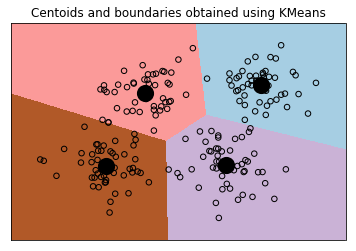

In [8]:
centroids = kmeans.cluster_centers_  # this is the cluster centroids
# drow cluster centroids
plt.scatter(centroids[:,0], centroids[:,1], marker='o', s=200, linewidths=3, 
           color='k', zorder=10, facecolor='black')
plt.title('Centoids and boundaries obtained using KMeans')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()